# Homework 4

## William Olsen

The purpose of this homework is to get used to plotting subsets of data.

We will begin by generating some data to mess with.

In [1]:
# first lets import the required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

t = np.linspace(0,np.pi*100,int(1e5))
N = 10+np.sin(t)
bkgd = stats.norm.rvs(size=int(1e5))*np.sqrt(N)+N

## Problem 1 - Subsets of Data

### Part A

**Make a scatter plot (not a line plot) of the first 1000 data points.**

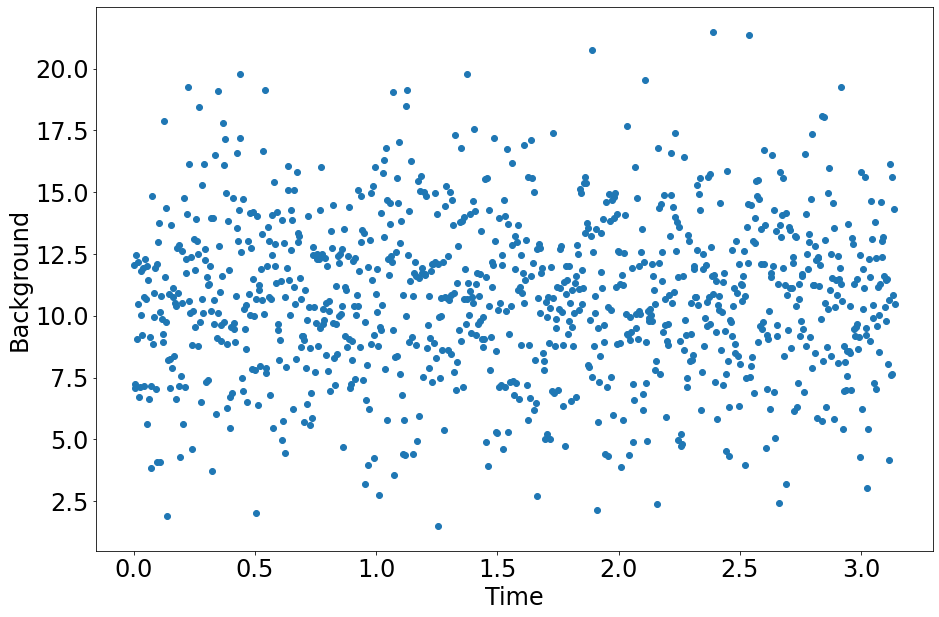

In [2]:
def generate_scatter_plot(x, y):
    plt.plot(x, y, 'o')
    plt.tick_params(labelsize=24)
    plt.xlabel('Time', fontsize=24)
    plt.ylabel('Background', fontsize=24)

p1a_t = t[0:1000]
p1a_bkgd = bkgd[0:1000]

generate_scatter_plot(p1a_t, p1a_bkgd)

### Part B

**Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.**

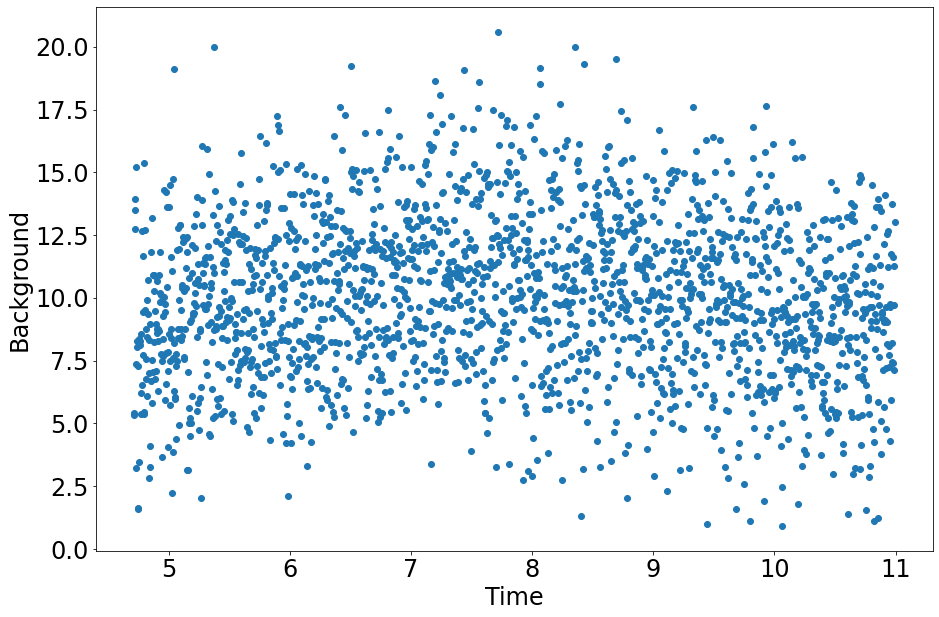

In [3]:
def get_subset(x, y, start, amount):
    return x[start:min(start+amount, len(x))], y[start:min(start+amount, len(y))]

p1b_t, p1b_bkgd = get_subset(t, bkgd, 1500, 2000)

generate_scatter_plot(p1b_t, p1b_bkgd)

### Part C

**Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.**

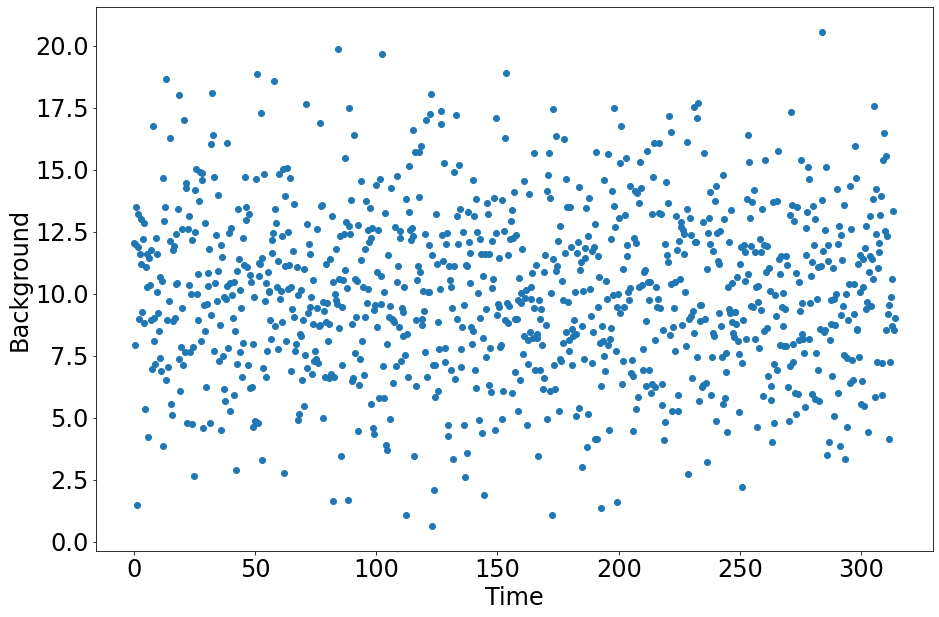

In [4]:
def get_subset_using_offset(x, y, offset):
    return x[0:len(x):offset], y[0:len(y):offset]

p1c_t, p1c_bkgd = get_subset_using_offset(t, bkgd, 100)

generate_scatter_plot(p1c_t, p1c_bkgd)

## Problem 2 - Density

When plotting all of the data on one plot you will get a big blob of data.  We can better view all of the data at once by using a histogram plot instead.

### Part A

**Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.**

Before we plot the histogram verison of our data, we will first plot all of the data on a scatter plot to get an idea of what that looks like:

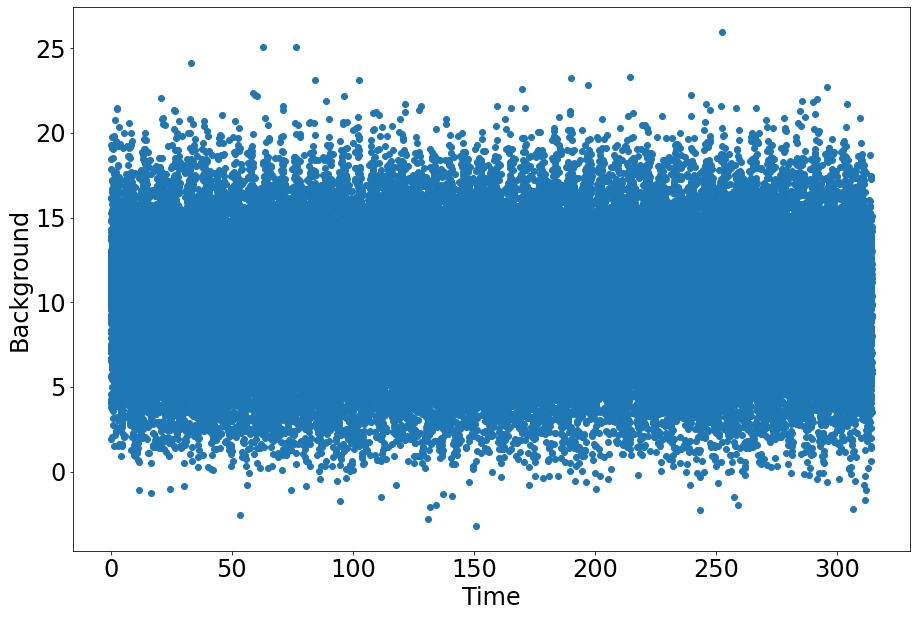

In [5]:
generate_scatter_plot(t, bkgd)

We see, when comparing to the plot from Problem 1, that there is a significant amount of overlap between the points.  Lets explore what the 2D histogram plot gives us.

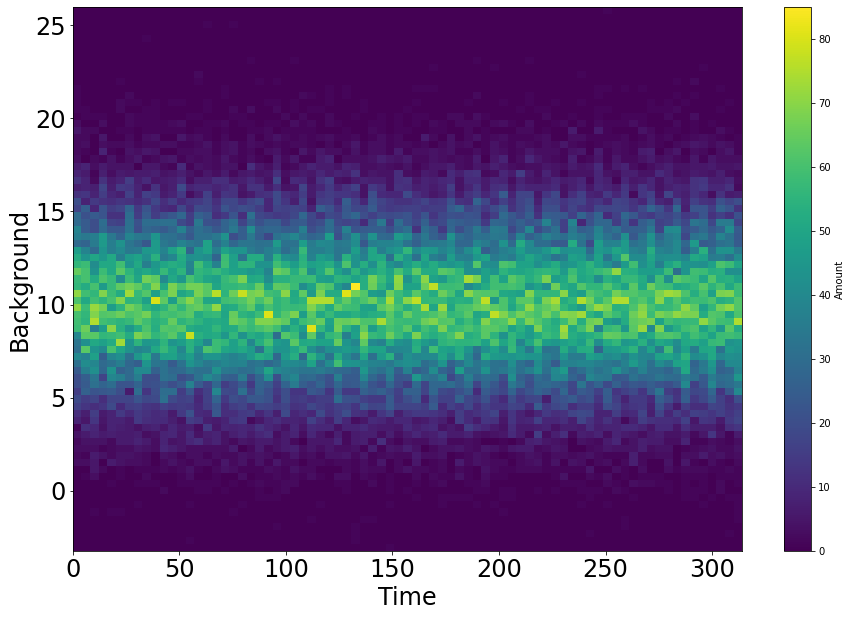

In [6]:
fig, ax = plt.subplots(1, 1)

hh = ax.hist2d(t, bkgd, bins=77)
plt.tick_params(labelsize=24)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Background', fontsize=24)

fig.colorbar(hh[3], ax=ax, label='Amount')

### Part B

**Clearly explain what is being plotted in your plot (e.g. what does each color mean?)**

In our above plot we are plotting in three dimensions.  Our data is in two dimensions, where given data point is provided by $(t_i, bkgd_i)$ for some $0 \leq i < 100000$.  However when we plot all 100000 points on one plot, there is a large amount of overlap between the points, some data points might even be exactly the same.  This information cannot be captured with a simple scatter plot which is why we instead plotted the 2D Histogram above.  We still have our previous dimensions but we gained a new dimension coming out of the page.  Our plotted region was divided into bins along the x and the y directions by the same amount.  Here we created 77 bins thus we will have a total of $77^2$ bins.  These bins are defined over some area in the xy-plane and the color of a bin is determined by the number of data points that lie within that bin.  We see that a purple color corresponds to a low data point density for that bin while a green color corresponds to a high data point density for that bin.

## Problem 3 - Folding

Now if you have a periodic signal, it is possible to fold the data stream at that period to make the pattern clearer.

### Part A

**Make an new time variable that folds at a period of $2\pi$. Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.)**

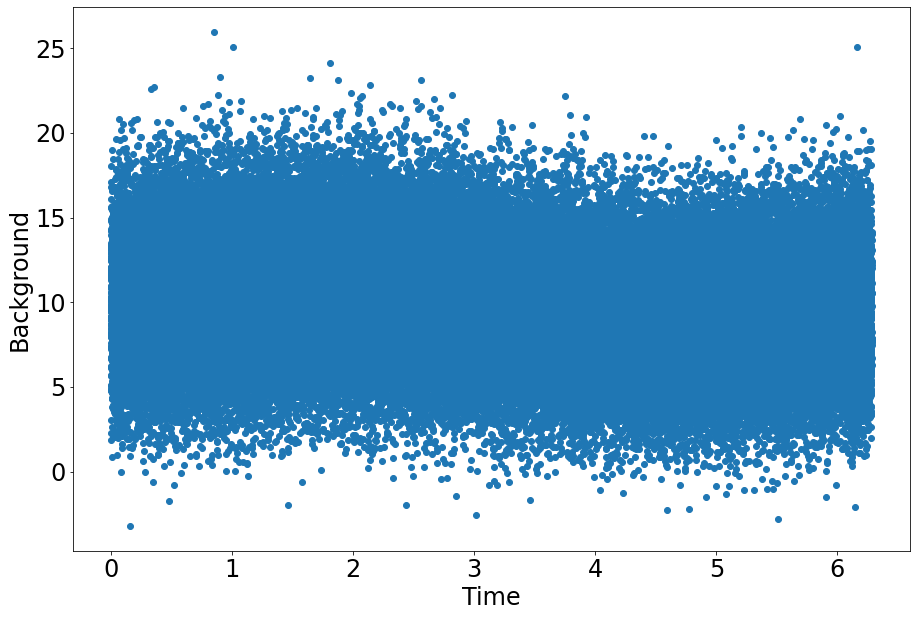

In [7]:
t_folded = t % (2*np.pi)

generate_scatter_plot(t_folded, bkgd)

Note that in the above plot we see the natual curvature of the sin wave beginning to appear in our data after folding our data.

### Part B

**Make a 2D histogram plot of your folded data.**

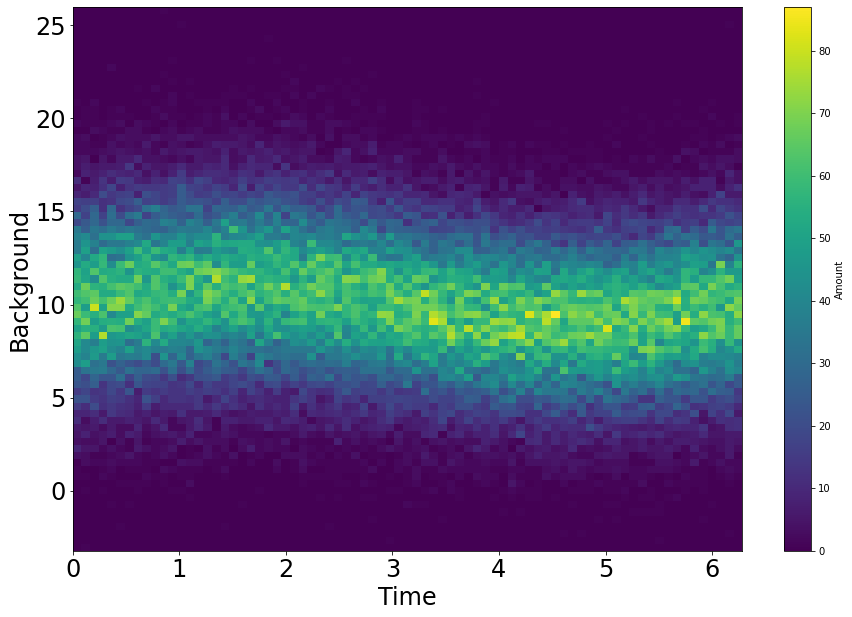

In [8]:
fig, ax = plt.subplots(1, 1)

hh = ax.hist2d(t_folded, bkgd, bins=77)
plt.tick_params(labelsize=24)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Background', fontsize=24)

fig.colorbar(hh[3], ax=ax, label='Amount')